Here, we try some basic classification models.  The models don't perform all that well.

In [1]:
import pickle
import os.path
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline
data = []
for i in range(10):
    path = 'check3' + str(i) + '.pkl'
    with open(path, 'rb') as picklefile:
        j = pickle.load(picklefile)
    data.append(j)
    print(i)

0
1
2
3
4
5
6
7
8
9


In [4]:
test = deepcopy(data[0])

In [70]:
rets = []
for i in range(10):
    rets.append(float(data[i]['EndPrice'][len(data[i])-1])/float(data[i]['StartPrice'][0]))
print(rets)
a = sum(rets)/len(rets)
print(a-1)
print(a**12 - 1)
print(' ')
trets = []
for i in range(10):
    trets.append(float(data[i]['EndPrice'][len(data[i])-1])/float(data[i]['StartPrice'][7160]))
print(trets)
b = sum(trets)/len(trets)
print(b - 1)
print((b**10)**4 -1)

[0.912630579297246, 0.9074773413897281, 0.9814488669719383, 0.9392594196621914, 0.9421921101518959, 0.9020156774916014, 0.9382547054509899, 0.8864429530201342, 0.9750865051903115, 0.9063231850117096]
-0.07088686563622537
-0.5861688346039983
 
[0.994824016563147, 0.9749467491632011, 1.0164153696498055, 1.002195009242144, 1.024720703589256, 0.9852005870841486, 0.9976088990539557, 0.9864077669902912, 1.0008523938059384, 0.9683646112600536]
-0.004846389359805747
-0.17661126222965318


So above, we've established a baseline.  Over the course of the month, these 10 stocks had an average annualized movement of -58.6%.  However, for all our other models, we're going to be evaluating them on our testset, so we should evaluate the baseline on the test set as well.  These 10 stocks, over the course of the test period, had an average annualized movement of -17.7%.

[1.0061952728151866, 1.0258227896881769, 1.0537168808812762, 1.0115908350324805, 1.0028391958774301, 0.97517590373403784, 0.98877030081264849, 0.97861093225168649, 0.99043951586974288, 0.99812423734405231]
0.00312858643067


([<matplotlib.axis.YTick at 0x1a2d610978>,
 <a list of 8 Text yticklabel objects>)

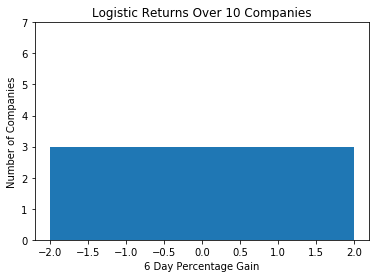

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
histread = []
forward = 1
def targ(x):
    ret = deepcopy(test1['logC'])
    for i in range(1,x+1):
        ret =[x+y for x,y in zip(ret,test1['logC'].shift(i))]
    return ret
for i in range(10):
    test1 = deepcopy(data[i])
    test1['target'] = targ(forward)
    test1.dropna(inplace=True)
    lc1 = deepcopy(test1['target'])
    del test1['TradedVolume']
    del test1['NumberOfTrades']
    del test1['EndPrice']
    del test1['logC']
    del test1['logEP']
    del test1['logMax']
    del test1['logMin']
    del test1['deLogMax']
    del test1['deLogMin']
    del test1['deLogSP']
    del test1['deLogEP']
    del test1['DateTime']
    del test1['Mnemonic']
    del test1['MaxPrice']
    del test1['MinPrice']
    y1 = [x>0 for x in lc1]
    a = int(.7*len(test1))
    trainX1 = test1[:a]
    trainy1 = y1[:a]
    testX1 = test1[a:]
    testy1 = y1[a:]
    monkey0 = LogisticRegression(C=10)
    monkey0.fit(trainX1,trainy1)
    preds0 = monkey0.predict(testX1)
    predprobs0 = monkey0.predict_proba(testX1)
    threshold = 0
    tc1 = lc1[a:].tolist()
    cum = np.zeros(forward)
    counter = 0
    for j in range(len(tc1)):
        if predprobs0[j][1]-predprobs0[j][0]>threshold:
            cum[j%forward]+=tc1[j]
            counter +=1
    rr = np.exp(cum)
    histread.append(np.average(rr))
print(histread)
print(sum(histread)/len(histread) - 1)
grax = deepcopy(histread)
histread = [100*(x-1) for x in grax]
plt.hist(histread, bins = [-2,0,2])
plt.ylabel('Number of Companies')
plt.xlabel('6 Day Percentage Gain')
plt.title('Logistic Returns Over 10 Companies')
plt.yticks([0,1,2,3,4,5,6,7],['0','1','2','3','4','5','6','7'])

Let's check out the annualized return of this predictor.

In [18]:
((sum(grax)/len(grax))**10)**4

1.177408131099587

([<matplotlib.axis.YTick at 0x1166f0668>,
 <a list of 5 Text yticklabel objects>)

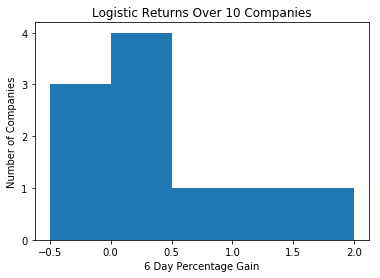

In [24]:
plt.hist(histread, bins = [-.5,0,.5,1,1.5,2])
plt.ylabel('Number of Companies')
plt.xlabel('6 Day Percentage Gain')
plt.title('Logistic Returns Over 10 Companies')
plt.yticks([0,1,2,3,4],['0','1','2','3','4'])

This model generated a negative return for 3 out of 10 companies.  Assuming that the model is equally likely to generated a positive return as a negative one, the p value for a result this extreme is about 17%.  I wouldn't be willing to put money behind a p value that large.

In [3]:
from sklearn.ensemble import RandomForestClassifier
histread = []
for i in range(10):
    test1 = deepcopy(data[i])
    lc1 = deepcopy(test1['logC'])
    #date = deepcopy(test['DateTime'])
    del test1['TradedVolume']
    del test1['NumberOfTrades']
    del test1['EndPrice']
    del test1['logC']
    del test1['logEP']
    del test1['logMax']
    del test1['logMin']
    del test1['deLogMax']
    del test1['deLogMin']
    del test1['deLogSP']
    del test1['deLogEP']
    del test1['DateTime']
    del test1['Mnemonic']
    del test1['MaxPrice']
    del test1['MinPrice']
    y1 = [x>0 for x in lc1]
    trainX1 = test1[:7160]
    trainy1 = y1[:7160]
    testX1 = test1[7160:]
    testy1 = y1[7160:]
    monkey0 = RandomForestClassifier(n_estimators = 20, random_state = 666)
    monkey0.fit(trainX1,trainy1)
    preds0 = monkey0.predict(testX1)
    predprobs0 = monkey0.predict_proba(testX1)
    threshold = .0005
    tc1 = lc1[7160:].tolist()
    cum = 0
    counter = 0
    for i in range(len(tc1)):
        if predprobs0[i][1]-predprobs0[i][0]>threshold:
            cum+=tc1[i]
            counter +=1
    histread.append(np.exp(cum))
print(histread)
grax = deepcopy(histread)
print(sum(histread)/len(histread) - 1)

[1.0029808265422187, 1.0136712219640824, 1.0023934644619243, 0.95429518887015907, 1.0073480887465025, 0.95766326874236651, 0.98447557632971405, 0.97014569491530667, 1.0043166218187782, 0.98644144058665639]
-0.0116268607022


In [9]:
sum(histread)

[1.0029808265422187, 1.0136712219640824, 1.0023934644619243, 0.95429518887015907, 1.0073480887465025, 0.95766326874236651, 0.98447557632971405, 0.97014569491530667, 1.0043166218187782, 0.98644144058665639]


Let's check out the annualized return of the random forest predictor.

In [16]:
((sum(grax)/len(grax))**10)**4 - 1

-0.37362074157679559

([<matplotlib.axis.YTick at 0x1a29d63ba8>,
 <a list of 6 Text yticklabel objects>)

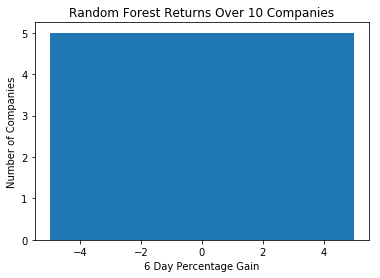

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
histread = [100*(x-1) for x in grax]
plt.hist(histread, bins = [-5,0,5])
plt.ylabel('Number of Companies')
plt.xlabel('6 Day Percentage Gain')
plt.title('Random Forest Returns Over 10 Companies')
plt.yticks([0,1,2,3,4,5],['0','1','2','3','4','5'])

This predictor got negative returns for exactly half of the companies.  Exactly what we'd expect from random guessing.